# K-Means Clustering

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#importing the dataset
dataset = pd.read_csv('drive/My Drive/practice/K-MeansClustering/Mall_Customers.csv')

In [4]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [0]:
X = dataset.iloc[:,[3,4]].values

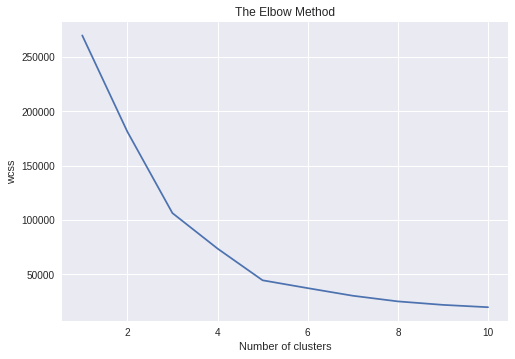

In [6]:
# finding the right number of clusters using Elbow method

from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =400, n_init = 20)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
  
#ploting the elbow

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [0]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', n_init = 10, max_iter = 300)
Y_kmeans = kmeans.fit_predict(X)

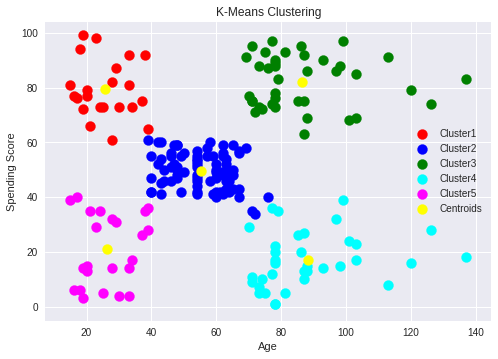

In [8]:
plt.scatter(X[Y_kmeans == 0, 0], X[Y_kmeans == 0, 1], s=100, c = 'red', label = 'Cluster1')
plt.scatter(X[Y_kmeans == 1, 0], X[Y_kmeans == 1, 1], s=100, c = 'blue', label = 'Cluster2')
plt.scatter(X[Y_kmeans == 2, 0], X[Y_kmeans == 2, 1], s=100, c = 'green', label = 'Cluster3')
plt.scatter(X[Y_kmeans == 3, 0], X[Y_kmeans == 3, 1], s=100, c = 'cyan', label = 'Cluster4')
plt.scatter(X[Y_kmeans == 4, 0], X[Y_kmeans == 4, 1], s=100, c = 'magenta', label = 'Cluster5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100, c = 'yellow', label = 'Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()
